### **1. importando pacotes**

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **2. importando o arquivo excel como dataset**

In [7]:
dataset = pd.read_excel('../data/raw/dados_pre_anonimizados_revisado_DFB_v2.xlsx')

In [8]:
dataset.isnull().sum()

id_paciente      0
idade            0
sexo             0
peso             0
altura           0
Classificação    0
inicio           0
termino          0
ido              0
fcminima         0
fcmedia          0
fcmaxima         0
bpm1             0
bpm2             0
bpm3             0
bpm4             0
bpm5             0
bpm6             0
bpm7             0
bpm8             0
bpm9             0
bpm10            0
bpm11            0
bpm12            0
bpm13            0
bpm14            0
bpm15            0
dtype: int64

### **3. limpeza inicial dos dados**

In [9]:
dataset.dtypes

id_paciente        int64
idade              int64
sexo              object
peso               int64
altura             int64
Classificação      int64
inicio            object
termino           object
ido              float64
fcminima           int64
fcmedia            int64
fcmaxima           int64
bpm1              object
bpm2              object
bpm3              object
bpm4              object
bpm5              object
bpm6              object
bpm7              object
bpm8              object
bpm9              object
bpm10             object
bpm11             object
bpm12             object
bpm13             object
bpm14             object
bpm15             object
dtype: object

In [10]:
bpms = ['bpm1', 'bpm2', 'bpm3', 'bpm4', 'bpm5', 'bpm6', 'bpm7', 'bpm8', 
        'bpm9', 'bpm10', 'bpm11', 'bpm12', 'bpm13', 'bpm14', 'bpm15']

dataset['inicio'] = pd.to_datetime(dataset['inicio'], format='%Y-%m-%d %H:%M:%S')
dataset['termino'] = pd.to_datetime(dataset['termino'], format='%Y-%m-%d %H:%M:%S')
dataset['sexo'] = dataset['sexo'].astype('string')

for bpm in bpms:
    dataset[bpm] = dataset[bpm].str.replace(" ", "")
    dataset[bpm] = dataset[bpm].str.strip()

dataset.dtypes

id_paciente               int64
idade                     int64
sexo                     string
peso                      int64
altura                    int64
Classificação             int64
inicio           datetime64[ns]
termino          datetime64[ns]
ido                     float64
fcminima                  int64
fcmedia                   int64
fcmaxima                  int64
bpm1                     object
bpm2                     object
bpm3                     object
bpm4                     object
bpm5                     object
bpm6                     object
bpm7                     object
bpm8                     object
bpm9                     object
bpm10                    object
bpm11                    object
bpm12                    object
bpm13                    object
bpm14                    object
bpm15                    object
dtype: object

In [11]:
dataset

,id_paciente,idade,sexo,peso,altura,Classificação,inicio,termino,ido,fcminima,...,bpm6,bpm7,bpm8,bpm9,bpm10,bpm11,bpm12,bpm13,bpm14,bpm15
0,193,49,m,90,182,1,2020-09-18 21:25:46,2020-09-19 05:43:26,12.7,42,...,69%,9%,3%,1%,0%,0%,0%,0%,0%,0%
1,193,51,m,90,182,2,2022-04-05 22:18:28,2022-04-06 03:56:20,9.1,45,...,12%,40%,39%,8%,1%,0%,0%,0%,0%,0%
2,193,51,m,90,182,3,2022-05-29 22:36:06,2022-05-30 05:55:22,7.3,42,...,68%,20%,4%,1%,0%,0%,0%,0%,0%,0%
3,221,52,f,77,170,1,2021-02-09 21:05:15,2021-02-10 05:35:19,4.6,54,...,4%,68%,25%,3%,1%,0%,0%,0%,0%,0%
4,221,52,f,77,170,2,2021-11-09 21:01:53,2021-11-10 05:05:21,6.9,52,...,5%,68%,23%,3%,1%,0%,0%,0%,0%,0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,254,37,m,80,175,2,2020-06-07 23:11:37,2020-06-08 05:08:43,3.9,49,...,6%,52%,28%,4%,8%,2%,0%,0%,0%,0%
92,254,39,m,83,175,3,2021-12-07 22:12:53,2021-12-08 06:28:29,3.7,37,...,68%,16%,3%,0%,0%,0%,0%,0%,0%,0%
93,200,53,f,87,167,1,2021-06-17 23:28:55,2021-06-18 05:29:01,15.8,58,...,0%,3%,68%,27%,2%,0%,0%,0%,0%,0%
94,200,53,f,87,167,2,2021-08-10 22:03:08,2021-08-11 06:21:56,11.2,53,...,1%,37%,48%,12%,2%,0%,0%,0%,0%,0%


In [12]:
for bpm in bpms:
    dataset[bpm] = dataset[bpm].str.rstrip("%").astype(float)/100

dataset.dtypes

id_paciente               int64
idade                     int64
sexo                     string
peso                      int64
altura                    int64
Classificação             int64
inicio           datetime64[ns]
termino          datetime64[ns]
ido                     float64
fcminima                  int64
fcmedia                   int64
fcmaxima                  int64
bpm1                    float64
bpm2                    float64
bpm3                    float64
bpm4                    float64
bpm5                    float64
bpm6                    float64
bpm7                    float64
bpm8                    float64
bpm9                    float64
bpm10                   float64
bpm11                   float64
bpm12                   float64
bpm13                   float64
bpm14                   float64
bpm15                   float64
dtype: object

In [13]:
dataset

,id_paciente,idade,sexo,peso,altura,Classificação,inicio,termino,ido,fcminima,...,bpm6,bpm7,bpm8,bpm9,bpm10,bpm11,bpm12,bpm13,bpm14,bpm15
0,193,49,m,90,182,1,2020-09-18 21:25:46,2020-09-19 05:43:26,12.7,42,...,0.69,0.09,0.03,0.01,0.00,0.00,0.0,0.0,0.0,0.0
1,193,51,m,90,182,2,2022-04-05 22:18:28,2022-04-06 03:56:20,9.1,45,...,0.12,0.40,0.39,0.08,0.01,0.00,0.0,0.0,0.0,0.0
2,193,51,m,90,182,3,2022-05-29 22:36:06,2022-05-30 05:55:22,7.3,42,...,0.68,0.20,0.04,0.01,0.00,0.00,0.0,0.0,0.0,0.0
3,221,52,f,77,170,1,2021-02-09 21:05:15,2021-02-10 05:35:19,4.6,54,...,0.04,0.68,0.25,0.03,0.01,0.00,0.0,0.0,0.0,0.0
4,221,52,f,77,170,2,2021-11-09 21:01:53,2021-11-10 05:05:21,6.9,52,...,0.05,0.68,0.23,0.03,0.01,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,254,37,m,80,175,2,2020-06-07 23:11:37,2020-06-08 05:08:43,3.9,49,...,0.06,0.52,0.28,0.04,0.08,0.02,0.0,0.0,0.0,0.0
92,254,39,m,83,175,3,2021-12-07 22:12:53,2021-12-08 06:28:29,3.7,37,...,0.68,0.16,0.03,0.00,0.00,0.00,0.0,0.0,0.0,0.0
93,200,53,f,87,167,1,2021-06-17 23:28:55,2021-06-18 05:29:01,15.8,58,...,0.00,0.03,0.68,0.27,0.02,0.00,0.0,0.0,0.0,0.0
94,200,53,f,87,167,2,2021-08-10 22:03:08,2021-08-11 06:21:56,11.2,53,...,0.01,0.37,0.48,0.12,0.02,0.00,0.0,0.0,0.0,0.0


In [14]:
dataset.isnull().sum()

id_paciente      0
idade            0
sexo             0
peso             0
altura           0
Classificação    0
inicio           0
termino          0
ido              0
fcminima         0
fcmedia          0
fcmaxima         0
bpm1             0
bpm2             0
bpm3             0
bpm4             0
bpm5             0
bpm6             0
bpm7             0
bpm8             0
bpm9             0
bpm10            0
bpm11            0
bpm12            0
bpm13            0
bpm14            0
bpm15            0
dtype: int64

### **4. inclusão de features importantes (IMC, grau de obesidade e grau de apneia)**

In [15]:
dataset['imc'] = (dataset['peso']/(dataset['altura']/100*dataset['altura']/100)).round(2)
dataset

,id_paciente,idade,sexo,peso,altura,Classificação,inicio,termino,ido,fcminima,...,bpm7,bpm8,bpm9,bpm10,bpm11,bpm12,bpm13,bpm14,bpm15,imc
0,193,49,m,90,182,1,2020-09-18 21:25:46,2020-09-19 05:43:26,12.7,42,...,0.09,0.03,0.01,0.00,0.00,0.0,0.0,0.0,0.0,27.17
1,193,51,m,90,182,2,2022-04-05 22:18:28,2022-04-06 03:56:20,9.1,45,...,0.40,0.39,0.08,0.01,0.00,0.0,0.0,0.0,0.0,27.17
2,193,51,m,90,182,3,2022-05-29 22:36:06,2022-05-30 05:55:22,7.3,42,...,0.20,0.04,0.01,0.00,0.00,0.0,0.0,0.0,0.0,27.17
3,221,52,f,77,170,1,2021-02-09 21:05:15,2021-02-10 05:35:19,4.6,54,...,0.68,0.25,0.03,0.01,0.00,0.0,0.0,0.0,0.0,26.64
4,221,52,f,77,170,2,2021-11-09 21:01:53,2021-11-10 05:05:21,6.9,52,...,0.68,0.23,0.03,0.01,0.00,0.0,0.0,0.0,0.0,26.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,254,37,m,80,175,2,2020-06-07 23:11:37,2020-06-08 05:08:43,3.9,49,...,0.52,0.28,0.04,0.08,0.02,0.0,0.0,0.0,0.0,26.12
92,254,39,m,83,175,3,2021-12-07 22:12:53,2021-12-08 06:28:29,3.7,37,...,0.16,0.03,0.00,0.00,0.00,0.0,0.0,0.0,0.0,27.10
93,200,53,f,87,167,1,2021-06-17 23:28:55,2021-06-18 05:29:01,15.8,58,...,0.03,0.68,0.27,0.02,0.00,0.0,0.0,0.0,0.0,31.20
94,200,53,f,87,167,2,2021-08-10 22:03:08,2021-08-11 06:21:56,11.2,53,...,0.37,0.48,0.12,0.02,0.00,0.0,0.0,0.0,0.0,31.20


In [16]:
dataset['imc']

0     27.17
1     27.17
2     27.17
3     26.64
4     26.64
      ...  
91    26.12
92    27.10
93    31.20
94    31.20
95    29.76
Name: imc, Length: 96, dtype: float64

In [12]:
conditions = [
              dataset['imc'].between(0,17),
              dataset['imc'].between(17,18.49),  
              dataset['imc'].between(18.5,24.99),
              dataset['imc'].between(25.0,29.99),
              dataset['imc'].between(30.0,34.99),
              dataset['imc'].between(35.0,39.99),
              dataset['imc'].ge(40)
             ]
choices = ['muito_abaixo_peso', 'abaixo_peso', 'peso_normal', 'acima_peso', 'obesidade_i', 'obesidade_ii', 'obesidade_iii']

dataset['situacao_imc'] = np.select(conditions, choices)
dataset   

,id_paciente,idade,sexo,peso,altura,Classificação,inicio,termino,ido,fcminima,...,bpm8,bpm9,bpm10,bpm11,bpm12,bpm13,bpm14,bpm15,imc,situacao_imc
0,193,49,m,90,182,1,2020-09-18 21:25:46,2020-09-19 05:43:26,12.7,42,...,0.03,0.01,0.00,0.00,0.0,0.0,0.0,0.0,27.17,acima_peso
1,193,51,m,90,182,2,2022-04-05 22:18:28,2022-04-06 03:56:20,9.1,45,...,0.39,0.08,0.01,0.00,0.0,0.0,0.0,0.0,27.17,acima_peso
2,193,51,m,90,182,3,2022-05-29 22:36:06,2022-05-30 05:55:22,7.3,42,...,0.04,0.01,0.00,0.00,0.0,0.0,0.0,0.0,27.17,acima_peso
3,221,52,f,77,170,1,2021-02-09 21:05:15,2021-02-10 05:35:19,4.6,54,...,0.25,0.03,0.01,0.00,0.0,0.0,0.0,0.0,26.64,acima_peso
4,221,52,f,77,170,2,2021-11-09 21:01:53,2021-11-10 05:05:21,6.9,52,...,0.23,0.03,0.01,0.00,0.0,0.0,0.0,0.0,26.64,acima_peso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,254,37,m,80,175,2,2020-06-07 23:11:37,2020-06-08 05:08:43,3.9,49,...,0.28,0.04,0.08,0.02,0.0,0.0,0.0,0.0,26.12,acima_peso
92,254,39,m,83,175,3,2021-12-07 22:12:53,2021-12-08 06:28:29,3.7,37,...,0.03,0.00,0.00,0.00,0.0,0.0,0.0,0.0,27.10,acima_peso
93,200,53,f,87,167,1,2021-06-17 23:28:55,2021-06-18 05:29:01,15.8,58,...,0.68,0.27,0.02,0.00,0.0,0.0,0.0,0.0,31.20,obesidade_i
94,200,53,f,87,167,2,2021-08-10 22:03:08,2021-08-11 06:21:56,11.2,53,...,0.48,0.12,0.02,0.00,0.0,0.0,0.0,0.0,31.20,obesidade_i


In [13]:
conditions = [
              dataset['ido'].lt(5.0),
              dataset['ido'].between(5.0, 14.99),  
              dataset['ido'].between(15.0, 29.99),
              dataset['ido'].ge(30)
             ]
choices = ['sem_apneia', 'apneia_leve', 'apneia_moderada', 'apneia_acentuada']

dataset['status_apneia'] = np.select(conditions, choices)
dataset

,id_paciente,idade,sexo,peso,altura,Classificação,inicio,termino,ido,fcminima,...,bpm9,bpm10,bpm11,bpm12,bpm13,bpm14,bpm15,imc,situacao_imc,status_apneia
0,193,49,m,90,182,1,2020-09-18 21:25:46,2020-09-19 05:43:26,12.7,42,...,0.01,0.00,0.00,0.0,0.0,0.0,0.0,27.17,acima_peso,apneia_leve
1,193,51,m,90,182,2,2022-04-05 22:18:28,2022-04-06 03:56:20,9.1,45,...,0.08,0.01,0.00,0.0,0.0,0.0,0.0,27.17,acima_peso,apneia_leve
2,193,51,m,90,182,3,2022-05-29 22:36:06,2022-05-30 05:55:22,7.3,42,...,0.01,0.00,0.00,0.0,0.0,0.0,0.0,27.17,acima_peso,apneia_leve
3,221,52,f,77,170,1,2021-02-09 21:05:15,2021-02-10 05:35:19,4.6,54,...,0.03,0.01,0.00,0.0,0.0,0.0,0.0,26.64,acima_peso,sem_apneia
4,221,52,f,77,170,2,2021-11-09 21:01:53,2021-11-10 05:05:21,6.9,52,...,0.03,0.01,0.00,0.0,0.0,0.0,0.0,26.64,acima_peso,apneia_leve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,254,37,m,80,175,2,2020-06-07 23:11:37,2020-06-08 05:08:43,3.9,49,...,0.04,0.08,0.02,0.0,0.0,0.0,0.0,26.12,acima_peso,sem_apneia
92,254,39,m,83,175,3,2021-12-07 22:12:53,2021-12-08 06:28:29,3.7,37,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,27.10,acima_peso,sem_apneia
93,200,53,f,87,167,1,2021-06-17 23:28:55,2021-06-18 05:29:01,15.8,58,...,0.27,0.02,0.00,0.0,0.0,0.0,0.0,31.20,obesidade_i,apneia_moderada
94,200,53,f,87,167,2,2021-08-10 22:03:08,2021-08-11 06:21:56,11.2,53,...,0.12,0.02,0.00,0.0,0.0,0.0,0.0,31.20,obesidade_i,apneia_leve


In [14]:
print(dataset.idade.min())
print(dataset.idade.max())

20
67


In [16]:
conditions = [
              dataset['idade'].between(20, 29),
              dataset['idade'].between(30, 39),
              dataset['idade'].between(40, 49),
              dataset['idade'].between(50, 59),
              dataset['idade'].ge(60)
             ]
choices = ['20-29', '30-39', '40-49', '50-59', '>60']

dataset['grupo_idade'] = np.select(conditions, choices)
dataset

,id_paciente,idade,sexo,peso,altura,Classificação,inicio,termino,ido,fcminima,...,bpm10,bpm11,bpm12,bpm13,bpm14,bpm15,imc,situacao_imc,status_apneia,grupo_idade
0,193,49,m,90,182,1,2020-09-18 21:25:46,2020-09-19 05:43:26,12.7,42,...,0.00,0.00,0.0,0.0,0.0,0.0,27.17,acima_peso,apneia_leve,40-49
1,193,51,m,90,182,2,2022-04-05 22:18:28,2022-04-06 03:56:20,9.1,45,...,0.01,0.00,0.0,0.0,0.0,0.0,27.17,acima_peso,apneia_leve,50-59
2,193,51,m,90,182,3,2022-05-29 22:36:06,2022-05-30 05:55:22,7.3,42,...,0.00,0.00,0.0,0.0,0.0,0.0,27.17,acima_peso,apneia_leve,50-59
3,221,52,f,77,170,1,2021-02-09 21:05:15,2021-02-10 05:35:19,4.6,54,...,0.01,0.00,0.0,0.0,0.0,0.0,26.64,acima_peso,sem_apneia,50-59
4,221,52,f,77,170,2,2021-11-09 21:01:53,2021-11-10 05:05:21,6.9,52,...,0.01,0.00,0.0,0.0,0.0,0.0,26.64,acima_peso,apneia_leve,50-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,254,37,m,80,175,2,2020-06-07 23:11:37,2020-06-08 05:08:43,3.9,49,...,0.08,0.02,0.0,0.0,0.0,0.0,26.12,acima_peso,sem_apneia,30-39
92,254,39,m,83,175,3,2021-12-07 22:12:53,2021-12-08 06:28:29,3.7,37,...,0.00,0.00,0.0,0.0,0.0,0.0,27.10,acima_peso,sem_apneia,30-39
93,200,53,f,87,167,1,2021-06-17 23:28:55,2021-06-18 05:29:01,15.8,58,...,0.02,0.00,0.0,0.0,0.0,0.0,31.20,obesidade_i,apneia_moderada,50-59
94,200,53,f,87,167,2,2021-08-10 22:03:08,2021-08-11 06:21:56,11.2,53,...,0.02,0.00,0.0,0.0,0.0,0.0,31.20,obesidade_i,apneia_leve,50-59


In [17]:
dataset_bkp = dataset.copy()
dataset = dataset[['id_paciente', 'sexo', 'idade', 'grupo_idade', 'imc', 'situacao_imc', 'ido', 'status_apneia', 'fcminima', 'fcmedia',  'fcmaxima']]
dataset

,id_paciente,sexo,idade,grupo_idade,imc,situacao_imc,ido,status_apneia,fcminima,fcmedia,fcmaxima
0,193,m,49,40-49,27.17,acima_peso,12.7,apneia_leve,42,53,118
1,193,m,51,50-59,27.17,acima_peso,9.1,apneia_leve,45,69,119
2,193,m,51,50-59,27.17,acima_peso,7.3,apneia_leve,42,57,106
3,221,f,52,50-59,26.64,acima_peso,4.6,sem_apneia,54,67,122
4,221,f,52,50-59,26.64,acima_peso,6.9,apneia_leve,52,67,117
...,...,...,...,...,...,...,...,...,...,...,...
91,254,m,37,30-39,26.12,acima_peso,3.9,sem_apneia,49,71,115
92,254,m,39,30-39,27.10,acima_peso,3.7,sem_apneia,37,55,98
93,200,f,53,50-59,31.20,obesidade_i,15.8,apneia_moderada,58,78,113
94,200,f,53,50-59,31.20,obesidade_i,11.2,apneia_leve,53,72,106


### **5. separação de datasets (baseline, primeiro exame e ultimo exame)**

In [18]:
dataset_baseline = dataset.groupby('id_paciente').first().reset_index()
dataset_baseline

,id_paciente,sexo,idade,grupo_idade,imc,situacao_imc,ido,status_apneia,fcminima,fcmedia,fcmaxima
0,176,m,59,50-59,34.29,obesidade_i,30.8,apneia_acentuada,45,59,103
1,177,m,41,40-49,29.49,acima_peso,5.2,apneia_leve,52,61,115
2,193,m,49,40-49,27.17,acima_peso,12.7,apneia_leve,42,53,118
3,194,f,57,50-59,35.84,obesidade_ii,13.2,apneia_leve,54,71,102
4,195,m,30,30-39,25.14,acima_peso,2.5,sem_apneia,45,60,112
5,200,f,53,50-59,31.20,obesidade_i,15.8,apneia_moderada,58,78,113
6,204,m,49,40-49,25.34,acima_peso,10.8,apneia_leve,49,71,120
7,214,f,60,>60,23.03,peso_normal,1.3,sem_apneia,49,63,105
8,221,f,52,50-59,26.64,acima_peso,4.6,sem_apneia,54,67,122
9,223,m,57,50-59,25.06,acima_peso,10.9,apneia_leve,41,54,101


In [19]:
dataset_primeiro_exame = dataset.groupby('id_paciente').nth(1).reset_index()
dataset_primeiro_exame

,id_paciente,sexo,idade,grupo_idade,imc,situacao_imc,ido,status_apneia,fcminima,fcmedia,fcmaxima
0,176,m,59,50-59,34.29,obesidade_i,31.7,apneia_acentuada,42,56,110
1,177,m,41,40-49,29.49,acima_peso,5.3,apneia_leve,49,58,114
2,193,m,51,50-59,27.17,acima_peso,9.1,apneia_leve,45,69,119
3,194,f,57,50-59,35.84,obesidade_ii,15.5,apneia_moderada,55,73,126
4,195,m,30,30-39,25.14,acima_peso,2.5,sem_apneia,42,61,126
5,200,f,53,50-59,31.20,obesidade_i,11.2,apneia_leve,53,72,106
6,204,m,50,50-59,25.34,acima_peso,4.4,sem_apneia,63,85,121
7,214,f,60,>60,23.03,peso_normal,0.6,sem_apneia,53,74,108
8,221,f,52,50-59,26.64,acima_peso,6.9,apneia_leve,52,67,117
9,223,m,57,50-59,25.06,acima_peso,3.5,sem_apneia,38,50,93


In [20]:
dataset_ultimo_exame = dataset.groupby('id_paciente').last().reset_index()
dataset_ultimo_exame

,id_paciente,sexo,idade,grupo_idade,imc,situacao_imc,ido,status_apneia,fcminima,fcmedia,fcmaxima
0,176,m,59,50-59,34.29,obesidade_i,24.1,apneia_moderada,47,57,98
1,177,m,42,40-49,29.49,acima_peso,5.6,apneia_leve,48,57,96
2,193,m,51,50-59,27.17,acima_peso,7.3,apneia_leve,42,57,106
3,194,f,57,50-59,35.84,obesidade_ii,5.3,apneia_leve,56,73,99
4,195,m,31,30-39,23.84,peso_normal,1.8,sem_apneia,46,66,102
5,200,f,53,50-59,29.76,acima_peso,7.7,apneia_leve,54,72,100
6,204,m,50,50-59,26.25,acima_peso,2.3,sem_apneia,56,75,115
7,214,f,60,>60,23.03,peso_normal,5.5,apneia_leve,52,65,93
8,221,f,53,50-59,25.95,acima_peso,8.1,apneia_leve,61,74,108
9,223,m,57,50-59,25.06,acima_peso,2.3,sem_apneia,46,65,95


In [21]:
# validando que cada recorte tem os mesmos pacientes
print(len(dataset_baseline))
print(len(dataset_primeiro_exame))
print(len(dataset_ultimo_exame))
print(list(dataset_baseline.id_paciente) == list (dataset_primeiro_exame.id_paciente))
print(list(dataset_primeiro_exame.id_paciente) == list (dataset_ultimo_exame.id_paciente))

32
32
32
True
True


### **6. visualização de dados**

#### **6.1 distribuição dos dados**

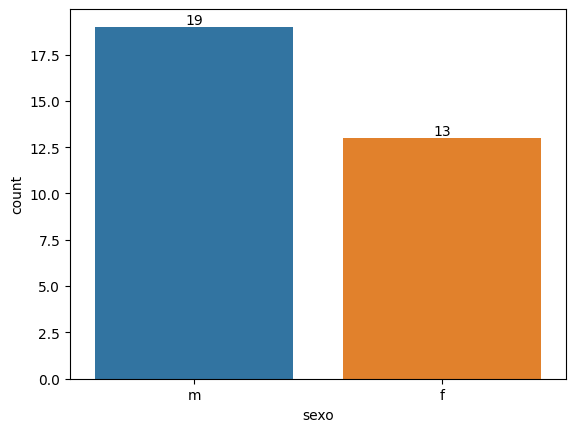

In [22]:
## sexo
ax = sns.countplot(dataset_baseline, x='sexo')
for i in ax.containers:
    ax.bar_label(i,)

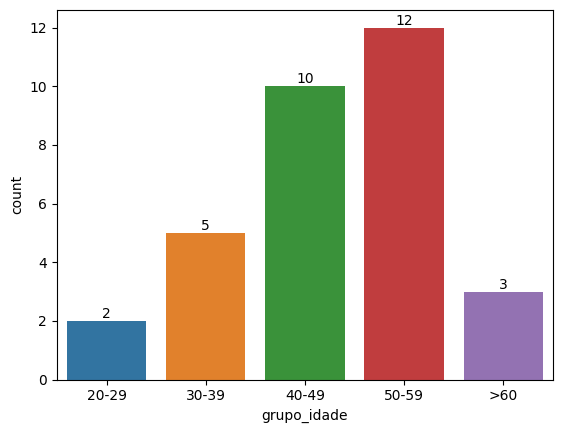

In [24]:
#### idade
ax = sns.countplot(dataset_baseline, x='grupo_idade', order=['20-29', '30-39', '40-49', '50-59', '>60'])
for i in ax.containers:
    ax.bar_label(i,)

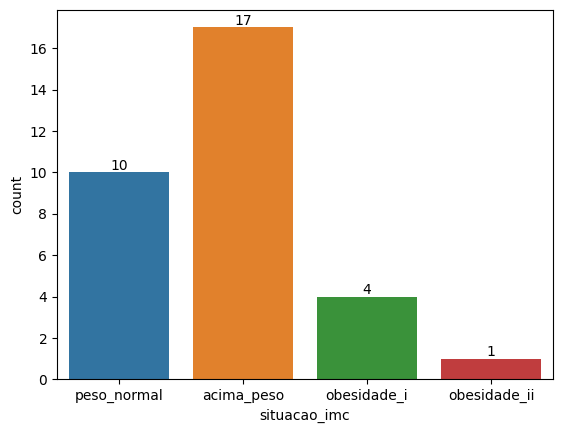

In [25]:
### situacao imc -- baseline
ax = sns.countplot(dataset_baseline, x='situacao_imc', order=['peso_normal', 'acima_peso', 'obesidade_i', 'obesidade_ii'])
for i in ax.containers:
    ax.bar_label(i,)

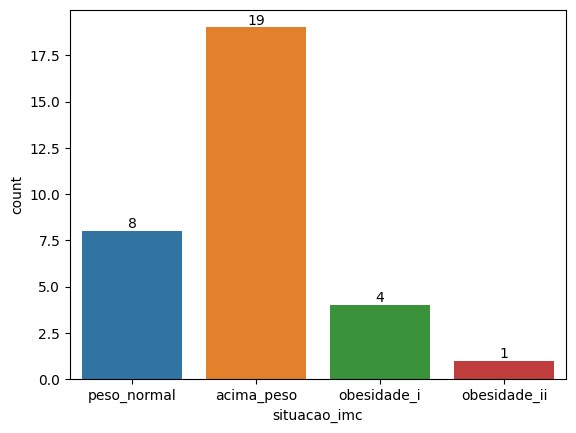

In [26]:
### situacao imc -- primeiro exame
ax = sns.countplot(dataset_primeiro_exame, x='situacao_imc', order=['peso_normal', 'acima_peso', 'obesidade_i', 'obesidade_ii'])
for i in ax.containers:
    ax.bar_label(i,)

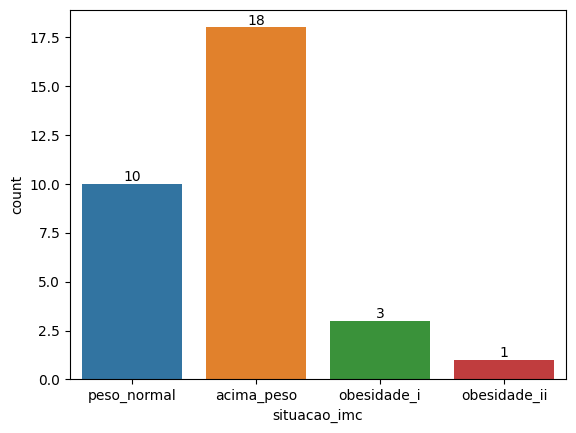

In [27]:
### situacao imc -- ultimo exame
ax = sns.countplot(dataset_ultimo_exame, x='situacao_imc', order=['peso_normal', 'acima_peso', 'obesidade_i', 'obesidade_ii'])
for i in ax.containers:
    ax.bar_label(i,)

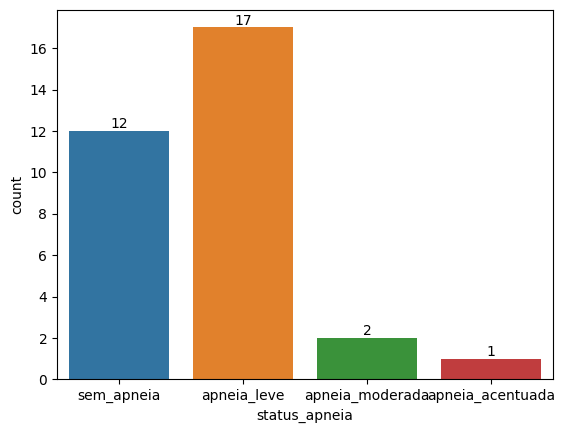

In [28]:
### status apneia -- baseline
ax = sns.countplot(dataset_baseline, x='status_apneia', order=['sem_apneia', 'apneia_leve', 'apneia_moderada',  'apneia_acentuada'])
for i in ax.containers:
    ax.bar_label(i,)

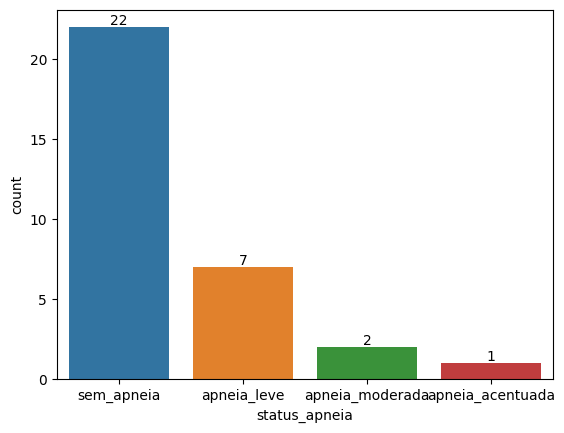

In [29]:
### status apneia -- primeiro exame
ax = sns.countplot(dataset_primeiro_exame, x='status_apneia', order=['sem_apneia', 'apneia_leve', 'apneia_moderada',  'apneia_acentuada'])
for i in ax.containers:
    ax.bar_label(i,)

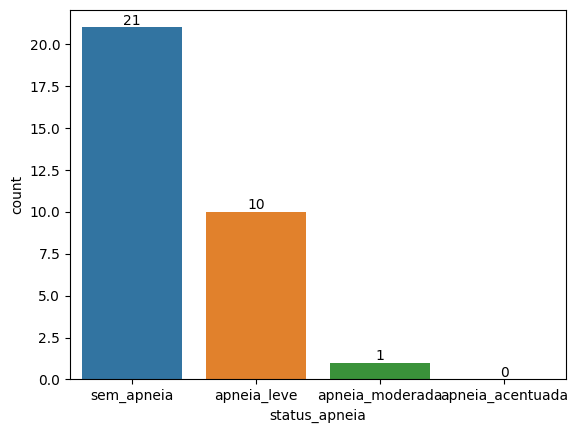

In [30]:
### status apneia -- ultimo exame
ax = sns.countplot(dataset_ultimo_exame, x='status_apneia', order=['sem_apneia', 'apneia_leve', 'apneia_moderada',  'apneia_acentuada'])
for i in ax.containers:
    ax.bar_label(i,)

<AxesSubplot:xlabel='grupo_idade', ylabel='ido'>

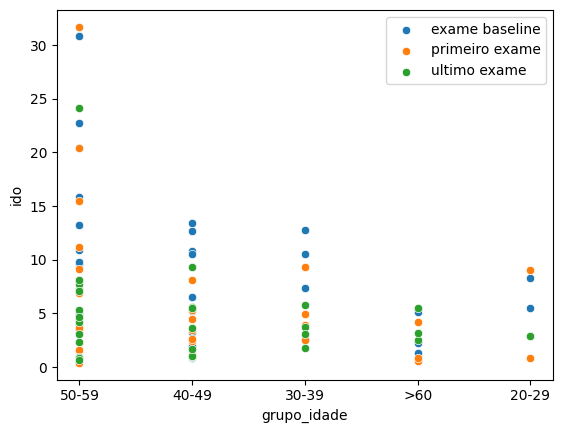

In [31]:
sns.scatterplot(data=dataset_baseline, x='grupo_idade', y='ido', label='exame baseline')
sns.scatterplot(data=dataset_primeiro_exame, x='grupo_idade', y='ido', label='primeiro exame')
sns.scatterplot(data=dataset_ultimo_exame, x='grupo_idade', y='ido', label='ultimo exame')

#### **6.2 correlação entre variáveis**

In [34]:
dataset[dataset.columns[1:]].corr()['ido'][:].sort_values(ascending=False).to_frame().dropna()

,ido
ido,1.000000
imc,0.585228
idade,0.172738
fcmaxima,-0.025223
fcminima,-0.091794
fcmedia,-0.122238


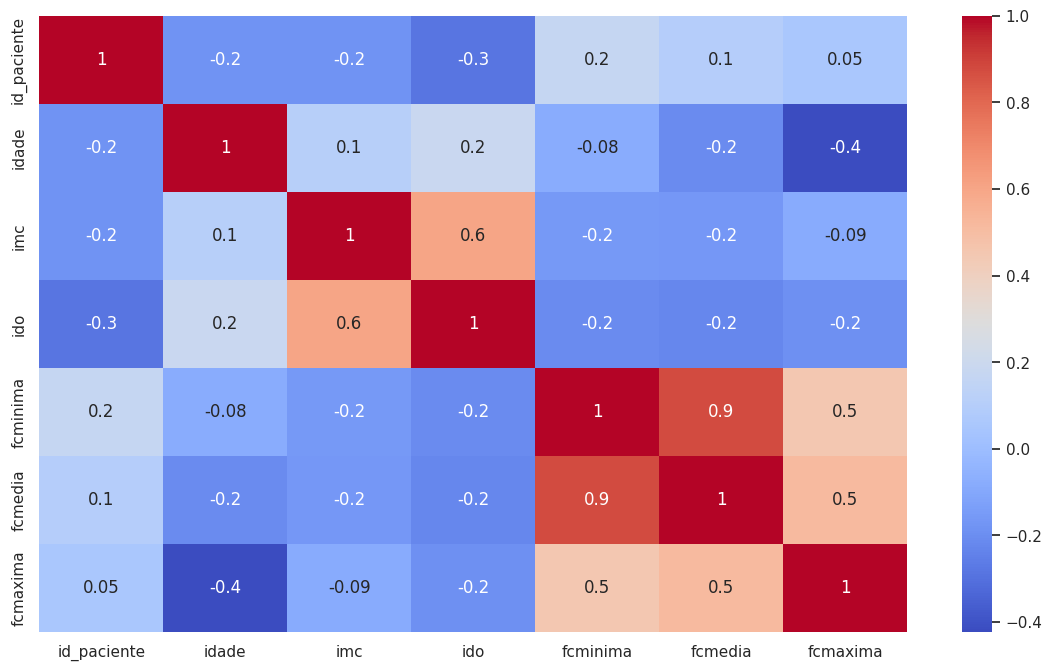

In [35]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = dataset_baseline.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.1g')

<AxesSubplot:xlabel='idade', ylabel='ido'>

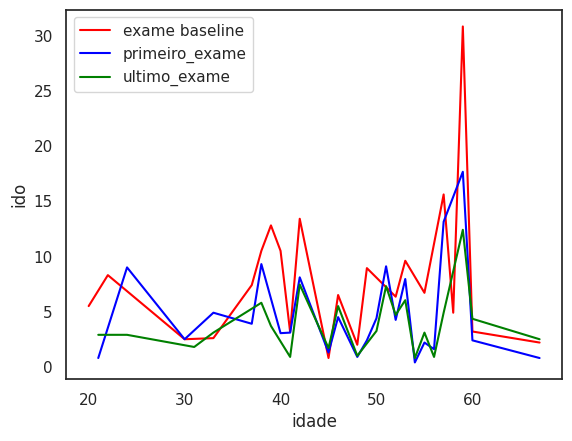

In [38]:
# evolucao de ido entre exames
sns.lineplot(data=dataset_baseline, x='idade', y='ido', errorbar=None, label='exame baseline', color='red')
sns.lineplot(data=dataset_primeiro_exame, x='idade', y='ido', errorbar=None, label='primeiro_exame', color='blue')
sns.lineplot(data=dataset_ultimo_exame, x='idade', y='ido', errorbar=None, label='ultimo_exame', color='green')

<AxesSubplot:xlabel='idade', ylabel='fcmedia'>

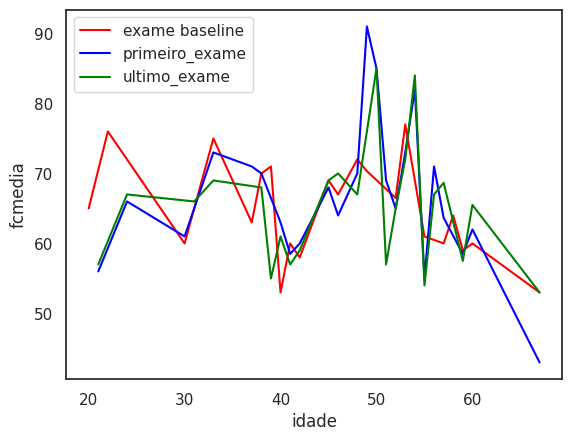

In [39]:
# evolucao de fcmedia entre exames
sns.lineplot(data=dataset_baseline, x='idade', y='fcmedia', errorbar=None, label='exame baseline', color='red')
sns.lineplot(data=dataset_primeiro_exame, x='idade', y='fcmedia', errorbar=None, label='primeiro_exame', color='blue')
sns.lineplot(data=dataset_ultimo_exame, x='idade', y='fcmedia', errorbar=None, label='ultimo_exame', color='green')

<AxesSubplot:xlabel='idade', ylabel='fcmaxima'>

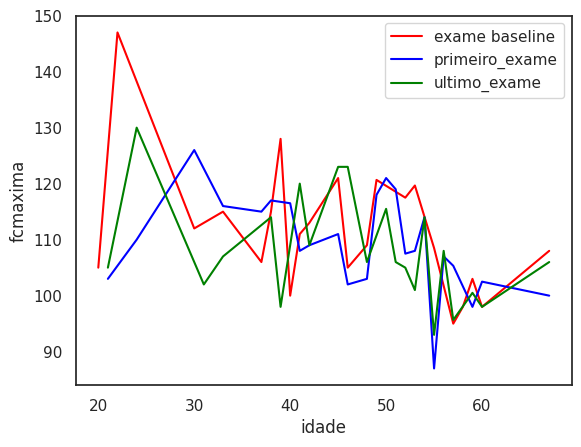

In [40]:
# evolucao de fcmaxima entre exames
sns.lineplot(data=dataset_baseline, x='idade', y='fcmaxima', errorbar=None, label='exame baseline', color='red')
sns.lineplot(data=dataset_primeiro_exame, x='idade', y='fcmaxima', errorbar=None, label='primeiro_exame', color='blue')
sns.lineplot(data=dataset_ultimo_exame, x='idade', y='fcmaxima', errorbar=None, label='ultimo_exame', color='green')

In [ ]:
if direcao_vezes[1] == "N":
    if posicaox - 1 >= 0:
        
        if pista[posicaox - 1][posicaoy]b == "." or pista[posicaox - 1][posicaoy] == "-":
            posicaox -= 1
            break

In [1]:
2++1

3